In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

C:\Users\irmew01\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
cntryname = ["AUS","AUT","BEL","CAN","DNK","FIN","FRA","DEU","GRC","ITA", "JPN", "NLD", "NZL","NOR","PRT","ESP","SWE","GBR","USA"]

df = pd.read_csv("./output/us-cross-section-ge.csv")

dflog = pd.read_csv("./output/us-cross-section-log.csv")

In [3]:
print(100*(dflog["∂W"].mean()-1))

print(100*(df["∂W"].mean()-1))

0.20909952259684506
1.3497739350029292


In [4]:
foo = pd.qcut(df.expenditure, 5,labels = False)

df["quantile-cut" ] = foo

dflog["quantile-cut" ] = foo 

In [5]:
grp = df.groupby("quantile-cut")

In [6]:
grp["∂W"].mean()

quantile-cut
0    1.029430
1    1.012879
2    1.009517
3    1.008185
4    1.006472
Name: ∂W, dtype: float64

In [7]:
(dflog.groupby("quantile-cut")["∂W"].mean()[0] - 1) / (dflog.groupby("quantile-cut")["∂W"].mean()[4] - 1)

0.7830640380873245

In [8]:
(df.groupby("quantile-cut")["∂W"].mean()[0] - 1) / (df.groupby("quantile-cut")["∂W"].mean()[4] - 1)

4.547454260547923

In [9]:
round(grp.assets.mean(),2)

quantile-cut
0   -0.45
1   -0.32
2   -0.26
3    0.07
4    1.02
Name: assets, dtype: float64

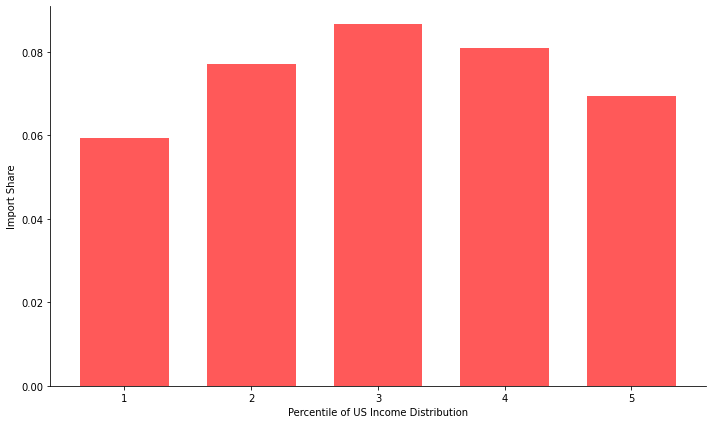

In [10]:
fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

hsr = ax.bar(grp.homeshare.median().index + 1, 
       1 - grp.homeshare.mean(), alpha = 0.65, width = 0.70, color = "red")

# ax.bar_label(hsr, round(1 - grp.homeshare.median(),2),
#                   padding=5, color='black', fontweight='bold')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_xlabel("Percentile of US Income Distribution")
ax.set_ylabel("Import Share")

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

plt.show()

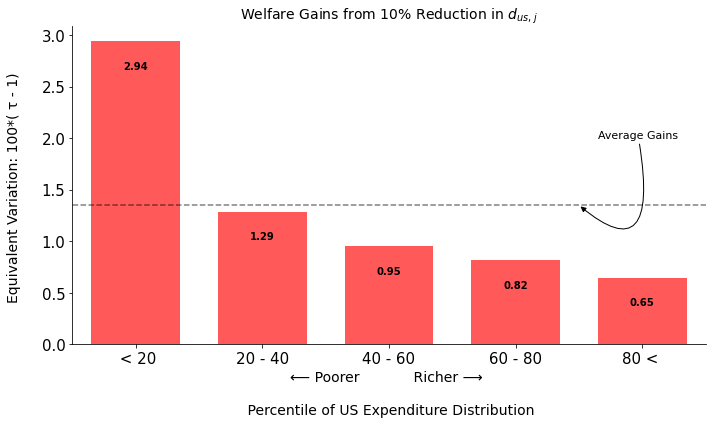

In [11]:
fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

hsr = ax.bar(grp.homeshare.median().index + 1, 
       100*(grp["∂W"].mean()-1), alpha = 0.65, width = 0.70, color = "red")

ax.bar_label(hsr, round(100*(grp["∂W"].mean()-1),2),
                  padding=-30, color='black', fontweight='bold')

ax.plot(range(0,7), round(100*(df["∂W"].mean()-1),2)*np.ones(7), alpha = 0.50, linestyle = "--", c = "black")

ax.set_xlim(.5,5.5)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Welfare Gains from 10% Reduction in $d_{us,j}$', fontsize=14)

ax.set_xlabel("⟵ Poorer            Richer ⟶ \n \n Percentile of US Expenditure Distribution", fontsize=14)
ax.set_ylabel("Equivalent Variation: 100*( τ - 1) \n", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

ax.xaxis.set_ticklabels([" < 20", "20 - 40", "40 - 60", "60 - 80", "80 < "])

avggain = 100*(df["∂W"].mean()-1)

ax.annotate(
    "Average Gains", 
    xy=(4.5, avggain), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(4.65, 2), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=280,angleB=-40",
        "color": "black"
    },
    fontsize=11,
)

# plt.savefig("../notes/figures/ge-welfare-household.pdf", bbox_inches = "tight")

plt.show()

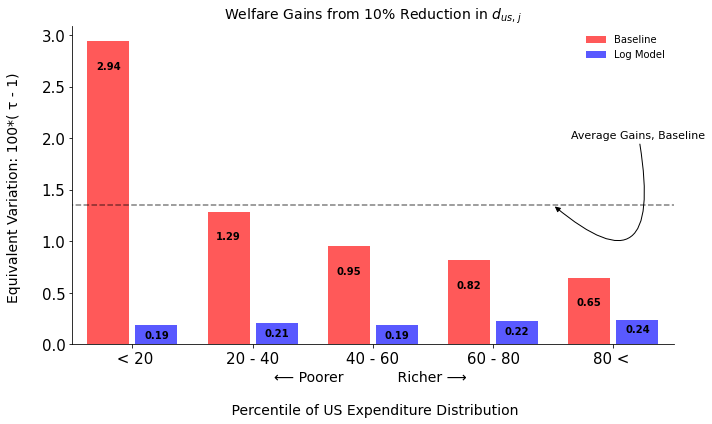

In [12]:
grplog = dflog.groupby("quantile-cut")

fig, ax = plt.subplots(figsize = [10.0,6.0], tight_layout = True)

offset = .20

hsr = ax.bar(grp.homeshare.median().index + 1 - offset, 
       100*(grp["∂W"].mean()-1), alpha = 0.65, width = 0.35, color = "red", label = "Baseline")

hsrlog = ax.bar(grp.homeshare.median().index + 1 + offset, 
       100*(grplog["∂W"].mean()-1), alpha = 0.65, width = 0.35, color = "blue", label = "Log Model")

ax.bar_label(hsr, round(100*(grp["∂W"].mean()-1),2),
                  padding=-30, color='black', fontweight='bold')

ax.bar_label(hsrlog, round(100*(grplog["∂W"].mean()-1),2),
                  padding=-15, color='black', fontweight='bold')

ax.plot(range(0,7), round(100*(df["∂W"].mean()-1),2)*np.ones(7), alpha = 0.50, linestyle = "--", c = "black")

ax.set_xlim(.5,5.5)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title('Welfare Gains from 10% Reduction in $d_{us,j}$', fontsize=14)

ax.set_xlabel("⟵ Poorer            Richer ⟶ \n \n Percentile of US Expenditure Distribution", fontsize=14)
ax.set_ylabel("Equivalent Variation: 100*( τ - 1) \n", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.xaxis.set_ticks(np.arange(1, 5+1, 1.0))

ax.xaxis.set_ticklabels([" < 20", "20 - 40", "40 - 60", "60 - 80", "80 < "])

ax.legend(loc='upper right', frameon=False)

avggain = 100*(df["∂W"].mean()-1)

ax.annotate(
    "Average Gains, Baseline", 
    xy=(4.5, avggain), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(4.65, 2), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=280,angleB=-40",
        "color": "black"
    },
    fontsize=11,
)

# plt.savefig("../notes/figures/ge-welfare-household-vs-log.pdf", bbox_inches = "tight")
plt.savefig("../notes/figures/ge-welfare-household-vs-log.png", bbox_inches = "tight")

plt.show()